### Simple simulation to obtain a gradient in cargo expression

In [1]:
from __future__ import division
import numpy as np

N = 9   # number of compartments

i = np.arange(1,N+1) # compartment indices
a = i[1:]            # transport to the right, rate constants
b = i[:-1]           # transport to the left, rate constants


# Create tridiagonal matrix, describing system of ODE's
A1 = b
A2 = -np.append(a,0)-np.append(0,b)
A3 = a
A =  np.diag(A1, 1) + np.diag(A2, 0) + np.diag(A3, -1)

# The model is given by:  du/dt = A*u
print 'a = ' + str(a)
print 'b = ' + str(b)
print 'A = \n' + str(A)

a = [2 3 4 5 6 7 8 9]
b = [1 2 3 4 5 6 7 8]
A = 
[[ -2   1   0   0   0   0   0   0   0]
 [  2  -4   2   0   0   0   0   0   0]
 [  0   3  -6   3   0   0   0   0   0]
 [  0   0   4  -8   4   0   0   0   0]
 [  0   0   0   5 -10   5   0   0   0]
 [  0   0   0   0   6 -12   6   0   0]
 [  0   0   0   0   0   7 -14   7   0]
 [  0   0   0   0   0   0   8 -16   8]
 [  0   0   0   0   0   0   0   9  -8]]


In [2]:
## du/dt = A*u, is solved by u(t) = expm(t*A)*u0
## Where expm is the matrix exponential (this is true for any linear time-invariant system of ODE's)
from scipy.linalg import expm

u0 = np.ones(N)  # initial condition (a uniform distribution of u)

t1,t2,t3 = 5e-1,15e-1,5e0
u1 = np.dot(expm(t1*A),u0)  # np.dot performs matrix multiplication
u2 = np.dot(expm(t2*A),u0)
u3 = np.dot(expm(t3*A),u0)

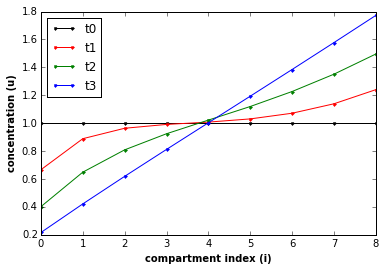

In [3]:
# Additional plot, not shown in paper
import pylab as plt
%matplotlib inline

plt.figure()
plt.plot(u0,'.-k',label='t0')
plt.plot(u1,'.-r',label='t1')
plt.plot(u2,'.-g',label='t2')
plt.plot(u3,'.-b',label='t3')
plt.xlabel('compartment index (i)',fontweight='bold')
plt.ylabel('concentration (u)',fontweight='bold')
plt.legend(loc='best')
plt.show()

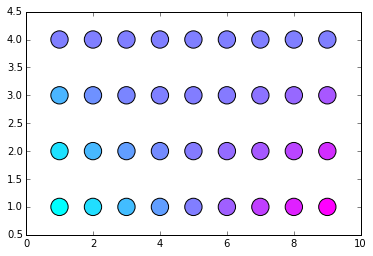

In [4]:
# Plot the concentration along the cable using the colormap 'cool'
# This was used to draw the figure in the paper
import matplotlib.cm as cm

plt.figure()
x = np.tile(i,4)
y = np.concatenate((4*np.ones(N),3*np.ones(N),2*np.ones(N),1*np.ones(N)))
u = np.concatenate((u0,u1,u2,u3))

plt.scatter(x, y, c=u, s=300, cmap=cm.cool)
plt.savefig('fig1_B.svg')
plt.show()

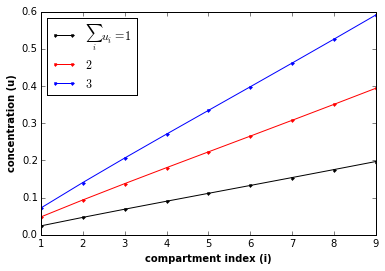

In [14]:
u0 = np.ones(N)  # initial condition (a uniform distribution of u)

uss_1 = np.dot(expm(5*A),u0/N)
uss_2 = np.dot(expm(5*A),u0*2/N)
uss_3 = np.dot(expm(5*A),u0*3/N)

plt.figure()
plt.plot(range(1,N+1),uss_1,'.-k',label='$\sum_i u_i = 1$')
plt.plot(range(1,N+1),uss_2,'.-r',label='$2$')
plt.plot(range(1,N+1),uss_3,'.-b',label='$3$')
plt.xlabel('compartment index (i)',fontweight='bold')
plt.ylabel('concentration (u)',fontweight='bold')
plt.legend(loc='best')
plt.savefig('fig1_C.svg')
plt.show()